In [7]:
import numpy as np
import matplotlib.pyplot as plt
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [8]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [9]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [10]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


In [11]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(176.5452, grad_fn=<MseLossBackward>)
epoch 0, loss 176.5452117919922
tensor(14.4229, grad_fn=<MseLossBackward>)
epoch 1, loss 14.422876358032227
tensor(1.1988, grad_fn=<MseLossBackward>)
epoch 2, loss 1.1988177299499512
tensor(0.1199, grad_fn=<MseLossBackward>)
epoch 3, loss 0.11992060393095016
tensor(0.0317, grad_fn=<MseLossBackward>)
epoch 4, loss 0.03167170286178589
tensor(0.0242, grad_fn=<MseLossBackward>)
epoch 5, loss 0.02422919124364853
tensor(0.0234, grad_fn=<MseLossBackward>)
epoch 6, loss 0.023380378261208534
tensor(0.0231, grad_fn=<MseLossBackward>)
epoch 7, loss 0.023072130978107452
tensor(0.0228, grad_fn=<MseLossBackward>)
epoch 8, loss 0.02281067706644535
tensor(0.0226, grad_fn=<MseLossBackward>)
epoch 9, loss 0.022555561736226082
tensor(0.0223, grad_fn=<MseLossBackward>)
epoch 10, loss 0.022303737699985504
tensor(0.0221, grad_fn=<MseLossBackward>)
epoch 11, loss 0.022054631263017654
tensor(0.0218, grad_fn=<MseLossBackward>)
epoch 12, loss 0.021808413788676262
tens

[[ 0.83145225]
 [ 2.8557248 ]
 [ 4.8799973 ]
 [ 6.9042697 ]
 [ 8.928542  ]
 [10.952815  ]
 [12.977087  ]
 [15.001359  ]
 [17.02563   ]
 [19.049904  ]
 [21.074177  ]]


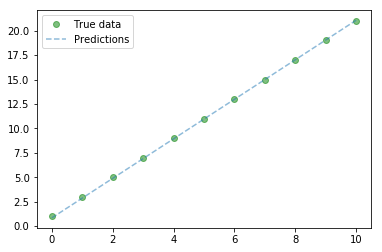

In [12]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()